## Final Project Submission

Please fill out:
* Student name: Kristen Tokunaga
* Student pace: part time 
* Scheduled project review date/time: 4/25/19 8 AM
* Instructor name: Brandon Lewis
* Blog post URL: https://kristentaytok.github.io/

# OSEMN = Obtain, scrub, explore, model, interpret
The data was obtained using the pandas read CSV function to import the file into a pandas dataframe. Null values were removed (i.e., dropped "nan" rows for view) or filled with the median (i.e., waterfront, year renovated), and other strings (i.e., "?") were also filled (with "nan", then rows were dropped) to help convert the data type from "object" to "float". Linear regression assumptions were checked and resolved (by taking the log of variables with skewed distributions) to achieve normality, linearity, and homoscedasticity--which helped increase the r-squared value of our model to bring it closer to 1, indicating a higher correlation of our predictor variables to the target variable (price) and has a high goodness of fit. The predictor variables with the highest correlation to price were: square footage of the living space, square footage of the space above the basement, square footage of the living space among the 15 nearest neighbors, and grade of the house (set by the King County grading system). A linear regression model was created using the predictor variables and the target variable, and validated using the train-test split and cross-validation methods to analyze the mean squared error of samples of the split dataset--which compares the actual vs. predicted values across the samples. The consistent and low value of the cross-validation MSE and small difference between the test and train MSEs indicate the model is not overfitting, and therefore generalizable to future cases.   

# Obtain Data
1. Import necessary libraries
2. Load and view dataset

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('seaborn')
kc_house_df = pd.read_csv('kc_house_data.csv')
print(kc_house_df.shape)
kc_house_df.head()
# Your code here - remember to use markdown cells for comments as well!

(21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Check for null values and get a count of null values for each column.

In [2]:
print(kc_house_df.isna().sum())
kc_house_df.describe()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


View unique values of columns with null values to help figure out what to do with them.

In [3]:
kc_house_df_unique_waterfront = kc_house_df['waterfront'].unique()
kc_house_df_unique_waterfront.sort()
print(kc_house_df_unique_waterfront)
kc_house_df_unique_view = kc_house_df['view'].unique()
kc_house_df_unique_view.sort()
print(kc_house_df_unique_view)
kc_house_df_unique_yr_renovated = kc_house_df['yr_renovated'].unique()
kc_house_df_unique_yr_renovated.sort()
print(kc_house_df_unique_yr_renovated)
kc_house_df_unique_sqft_basement = kc_house_df['sqft_basement'].unique()
kc_house_df_unique_sqft_basement.sort()
print(kc_house_df_unique_sqft_basement)
kc_house_df_unique_grade = kc_house_df['grade'].unique()
kc_house_df_unique_grade.sort()
print(kc_house_df_unique_grade)
kc_house_df_unique_condition = kc_house_df['condition'].unique()
kc_house_df_unique_condition.sort()
print(kc_house_df_unique_condition)
kc_house_df_unique_zipcode = kc_house_df['zipcode'].unique()
kc_house_df_unique_zipcode.sort()
print(kc_house_df_unique_zipcode)

[ 0.  1. nan]
[ 0.  1.  2.  3.  4. nan]
[   0. 1934. 1940. 1944. 1945. 1946. 1948. 1950. 1951. 1953. 1954. 1955.
 1956. 1957. 1958. 1959. 1960. 1962. 1963. 1964. 1965. 1967. 1968. 1969.
 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981.
 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993.
 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005.
 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.   nan]
['0.0' '10.0' '100.0' '1000.0' '1008.0' '1010.0' '1020.0' '1024.0'
 '1030.0' '1040.0' '1050.0' '1060.0' '1070.0' '1080.0' '1090.0' '110.0'
 '1100.0' '1110.0' '1120.0' '1130.0' '1135.0' '1140.0' '1150.0' '1160.0'
 '1170.0' '1180.0' '1190.0' '120.0' '1200.0' '1210.0' '1220.0' '1230.0'
 '1240.0' '1245.0' '1248.0' '1250.0' '1260.0' '1270.0' '1275.0' '1280.0'
 '1281.0' '1284.0' '1290.0' '130.0' '1300.0' '1310.0' '1320.0' '1330.0'
 '1340.0' '1350.0' '1360.0' '1370.0' '1380.0' '1390.0' '140.0' '1400.0'
 '1410.0' '1420.0' '143.0'

Check for data types (int vs. float vs. object [string])

In [4]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# Scrub the Data
1. Subsampling: not necessary because the dataset is relatively small and easy to work with
2. Dealing with null values
3. Dealing with datatypes
4. Checking for multicolinearity
5. Remove unnecessary columns

In [5]:
column = ['view']
kc_house_df_dropviewna = kc_house_df.dropna(axis=0, how='any', subset = column)
kc_house_df_dropviewna.isna().sum()
#'View' column had 63/21,000 records with null values. Given such a small number of null values, I dropped all rows containing null values for 'view'.

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2370
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3830
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Column 'waterfront' is likely a categorical datatype, however it is currently encoded as a numerical datatype in the original dataset. This is confirmed by looking at the unique values, which show discrete numbers. Additionally, waterfront contains null values. 

In [6]:

kc_house_df_dropviewna.waterfront = kc_house_df_dropviewna.waterfront.astype('str')

columns = ['yr_renovated']
kc_house_df_fillna = kc_house_df_dropviewna.fillna(kc_house_df_dropviewna[columns].median()) 
print(kc_house_df_fillna.isna().sum())
kc_house_df_fillna.info()
#Removing null values for 'waterfront' and 'yr_renovated' would have resulted in removing ~1/4 of our data (5000/21,000) which could result in losing a lot of valuable information. To help preserve the statistical distribution of the dataset, 'waterfront' was converted to string datatype where the unique values are either 'nan', '0', or '1'; while the null values ('nan') were replaced or "filled" by the median for 'yr_renovated'.

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null object
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above   

/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Checking for any remaining null or invalid values. 

In [7]:
print(kc_house_df_fillna.shape)
print(kc_house_df_fillna.info())
kc_house_df_fillna['sqft_basement'].replace('?','nan',inplace=True)
kc_house_df_fillna['sqft_basement'] = kc_house_df_fillna['sqft_basement'].astype('float64')
print(kc_house_df_fillna.isna().sum())
column = ['sqft_basement']
kc_house_df_dropsqft_basementna = kc_house_df_fillna.dropna(axis=0, how='any', subset = column)
print(kc_house_df_dropsqft_basementna.shape)
print(kc_house_df_dropsqft_basementna.info())
kc_house_df_dropsqft_basementna.describe()
#sqft_basement had a '?' when we looked at its unique values, which prevents it from being converted to a numeric datatype. To deal with this invalid value, I first converted '?' to a 'nan', converted it to a float datatype, then dropped the rows with 'nan' values because it only accounted for 452 values out of ~21,500. 

(21534, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null object
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(7), int64(11), object(3)
memory usage: 3.6+ MB
N

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.108200e+04,2.108200e+04,21082.000000,21082.000000,21082.000000,2.108200e+04,21082.00000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000
mean,4.582793e+09,5.402469e+05,3.372403,2.115916,2080.359975,1.507759e+04,1.49362,0.233327,3.409828,7.657717,1789.000000,291.359975,1971.023337,68.359359,98077.858837,47.560371,-122.213843,1986.917418,12732.514135
std,2.876423e+09,3.667323e+05,0.924996,0.768142,917.856396,4.117338e+04,0.53937,0.765066,0.650597,1.173690,828.369355,442.007858,29.323120,363.029573,53.528769,0.138568,0.140607,685.544250,27148.781580
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.00000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123700e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.00000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471325,-122.328000,1490.000000,5100.000000
50%,3.904970e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.50000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.230000,1840.000000,7626.000000
75%,7.312200e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069775e+04,2.00000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10088.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.50000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Check for multicolinearity and correlation with our target variable using a correlation heatmap (diverging colormap). 

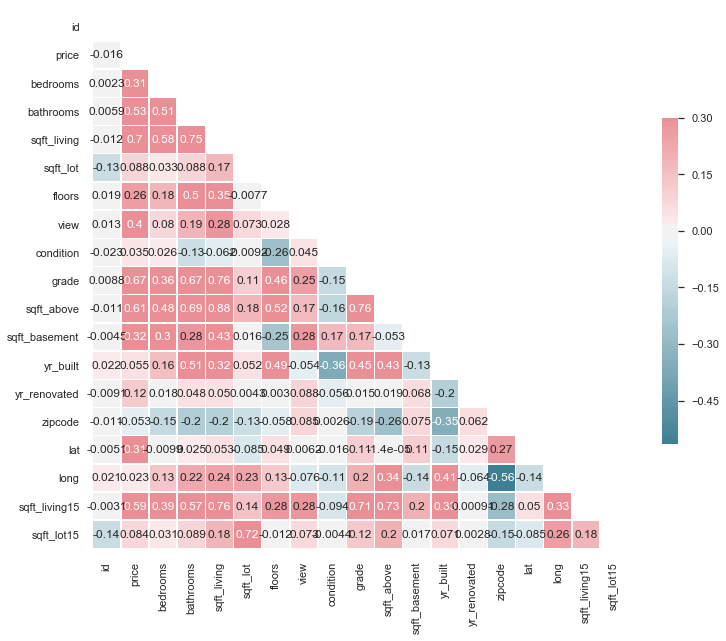

In [8]:
sns.set(style="white")
corr = kc_house_df_dropsqft_basementna.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
#Square footage of home is most highly correlated with price (our target variable). Grade, quare footage above the basement, bathrooms, and square footage of the living space for the nearest 15 neighbors are also correlated with price. 

Build a correlation matrix to identify predictors with an absolute value indicating a high correlation with other predictor variables, which will come up as 'True' in the table below. A predictor with an absolute value of around 0.7-0.8 is considered highly correlated, and we would want to know if it's highly correlated in a positive or negative relationship. 

The interpretation of a regression coefficient is that it represents the average change in the dependent variable for each 1 unit change in a predictor, assuming that all the other predictor variables are kept constant. Because the idea behind regression is that you can change one variable and keep the others constant, correlation is a problem, because it indicates that changes in one predictor are associated with changes in another one as well. Because of this, the estimates of the coefficients can have big fluctuations as a result of small changes in the model. As a result, you may not be able to trust the p-values associated with correlated predictors. So, to meet the OLS linear regression assumptions, we may need to remove some predictor variables to minimize errors in our model.

In [9]:
data_pred= kc_house_df_dropsqft_basementna.iloc[:,3:]
abs(data_pred.corr()) > 0.75

#Some of the predictors have some correlation with each other, but their relationships make sense (e.g., size of house is correlated with size of house above basement, number of bathrooms). Square footage of the nearest 15 neighbors' houses is also highly correlated with square footage of the house.

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False
sqft_above,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


Using a jointplot to check our assumptions for normality, linearity, and homoscedasticity.

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


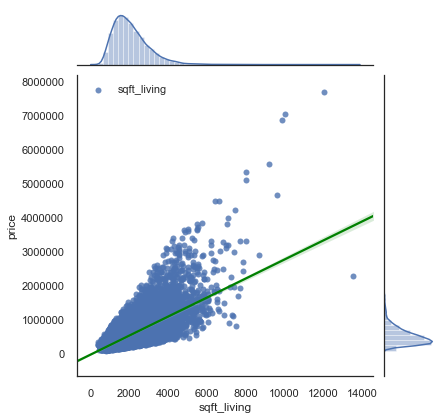

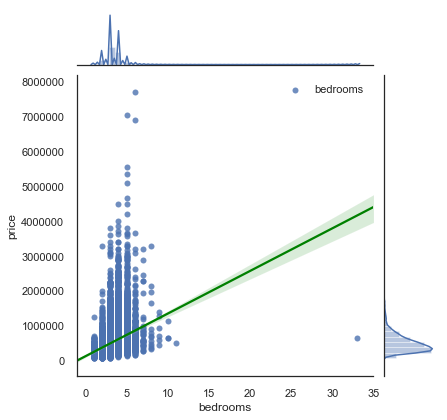

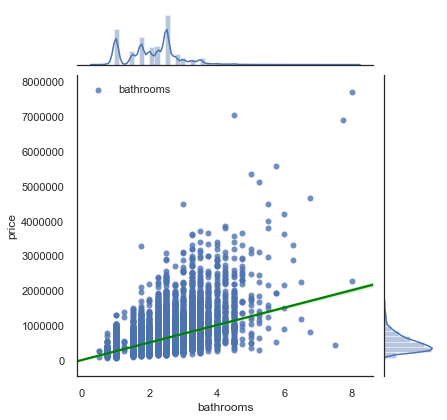

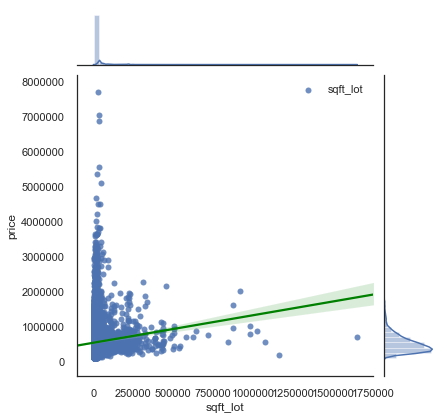

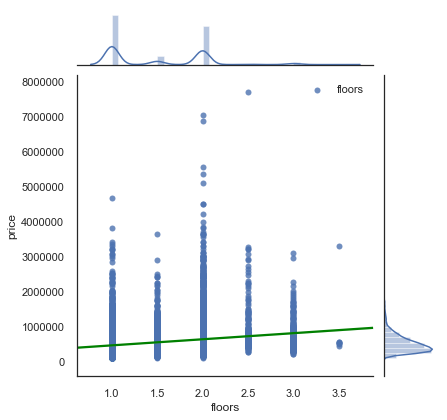

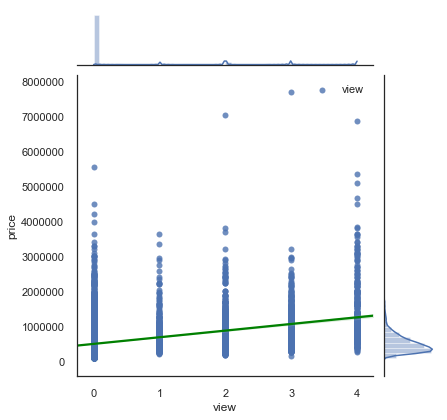

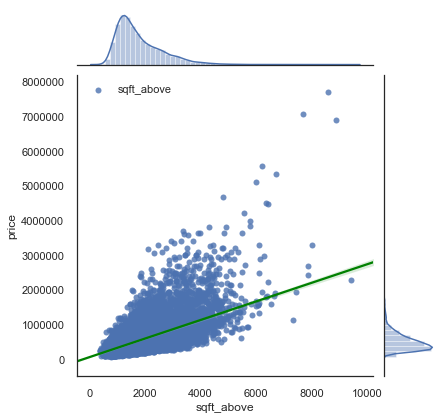

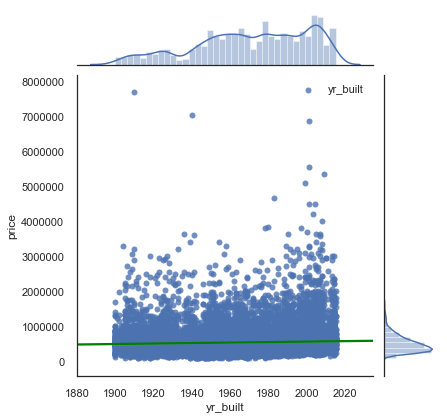

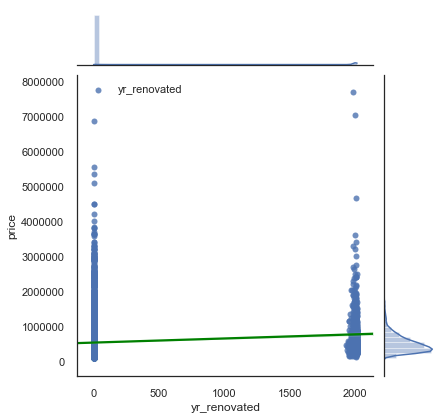

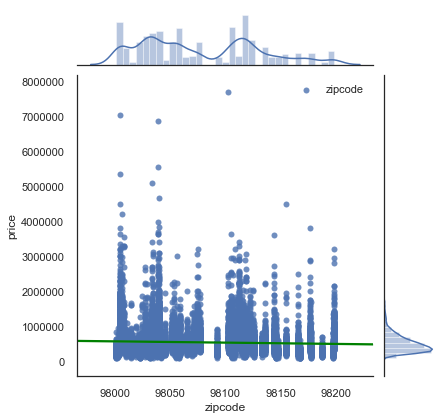

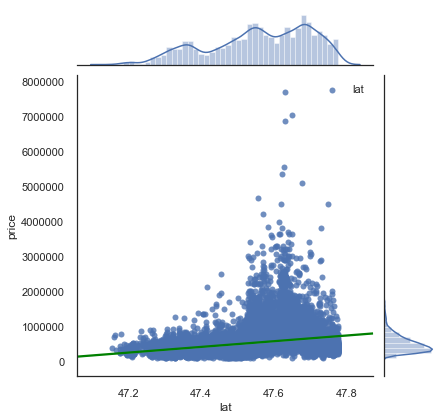

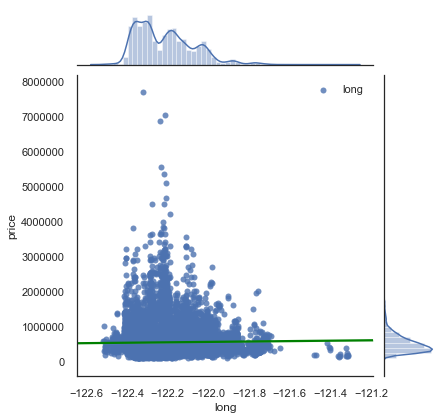

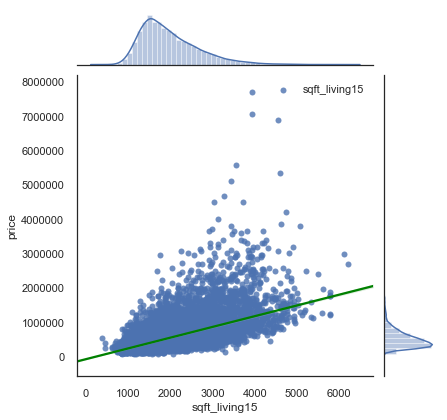

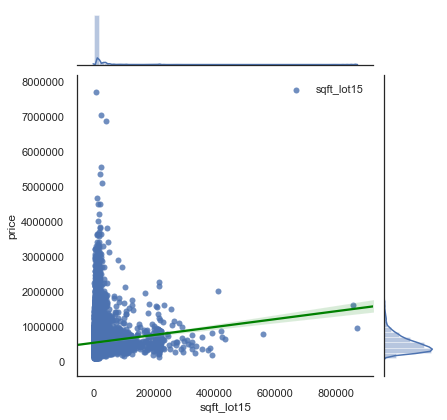

In [10]:

for column in [ 'sqft_living','bedrooms', 'bathrooms',
       'sqft_lot', 'floors', 'view', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']:
    sns.jointplot(x=column, y="price",
                  data=kc_house_df_dropsqft_basementna, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})
    plt.legend()
    plt.show()
#The scatterplots with regression lines of the jointplot above confirm the positive linear relationships between some of our predictors with the housing prices in KC; however, there appears to be some heteroscedasticity of values around the regression line. Among the top 4 correlated predictor variables (sqft_living, sqft_above, grade, and sqft_living15), sqft_living, sqft_above, and sqft_living 15 follows a normal distribution--as indicated by the histograms and KDEs of the jointplot above; however, they all appear to have a positive skew.   


Variables with string datatypes do not get factored into regression and correlation analyses. Additionally, certain columns may not have direct effects on housing prices in the form by which they are included in our dataset: for example, 'id' is a dataframe identifier for each row, which has no effect on house prices and 'date' (on which the house was sold between 2014 and 2015) likely doesn't have an effect on the house of the price today; and while location can have an effect, it's not one that can be definitevely correlated by statistically comparing numeric values of zip code, latitude, and longitude. Due to multicolinearity identified on the correlation matrix previously, I have also decided to drop sqft_living15 for this analysis. 

# Explore the Data
1. Understand data
2. Derive statistics
3. Create visualizations

In [11]:
# build a subset of numerical variables
subsets = ['price', 'grade', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'sqft_basement', 
           'yr_built', 'yr_renovated', 'sqft_above', 'sqft_lot15']

# make the statistics easier to read and understand
data_descriptives = round(kc_house_df_dropsqft_basementna[subsets].describe(), 3)
data_descriptives 
#https://github.com/BrittaInData/dsc-1-final-project-online-ds-ft-100118/blob/master/01_Final_Notebook.ipynb
#Some variables have very large standards of deviation (e.g., price, sqft_lot, view, sqft_basement, sqft_lot15)--when comparing standard deviation to their respective means. This indicates there are likely major outliers in the data. A large majority of houses were not viewed before they were sold, as indicated by the 25%, 50%, and 75% (1st, 2nd, and 3rd quartiles) being 0. These measures of spread indicate that 75% of the houses in this dataset were sold with 0 views. 

,price,grade,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_basement,yr_built,yr_renovated,sqft_above,sqft_lot15
count,21082.000,21082.000,21082.000,21082.000,21082.000,21082.000,21082.000,21082.000,21082.000,21082.000,21082.000,21082.000,21082.000
mean,540246.890,7.658,3.372,2.116,2080.360,15077.588,1.494,0.233,291.360,1971.023,68.359,1789.000,12732.514
std,366732.337,1.174,0.925,0.768,917.856,41173.379,0.539,0.765,442.008,29.323,363.030,828.369,27148.782
min,78000.000,3.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1900.000,0.000,370.000,651.000
25%,322000.000,7.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,1952.000,0.000,1200.000,5100.000
50%,450000.000,7.000,3.000,2.250,1910.000,7620.000,1.500,0.000,0.000,1975.000,0.000,1560.000,7626.000
75%,645000.000,8.000,4.000,2.500,2550.000,10697.750,2.000,0.000,560.000,1997.000,0.000,2210.000,10088.750
max,7700000.000,13.000,33.000,8.000,13540.000,1651359.000,3.500,4.000,4820.000,2015.000,2015.000,9410.000,871200.000


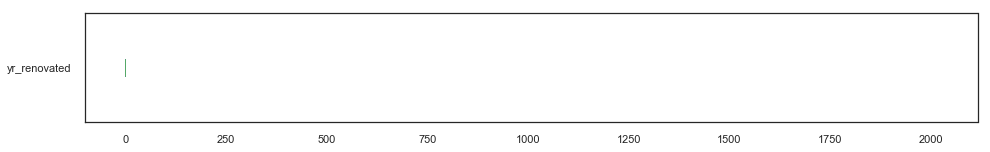

In [12]:
kc_house_df_dropsqft_basementna['yr_renovated'].plot(kind='box', vert=False, figsize=(16,2));
#The yr_renovated scatterplot showed a large gap in between 0 and ~2000 and this is confirmed by the 1st, 2nd, and 3rd quartiles being 0 in the descriptive statistics table above and the box plot below. It may be helpful to bin these to help visualize different decades of renovation, since the unique values show renovations ranging from the 1930s to 2010s. 

In [13]:
# Binning
bins = [0., 1930., 1950., 1980., 1990., 2000., 2015.]
names = ['never', '1930-1949', '1950-1979', '1980-1989', '1990-1999', '2000-2015']
kc_house_df_dropsqft_basementna['yr_ren_cat'] = pd.cut(kc_house_df_dropsqft_basementna['yr_renovated'], bins, labels=names, right=False)

print('\n*** Unique Values ***')
print(kc_house_df_dropsqft_basementna.yr_ren_cat.unique())
print('\n*** Value Counts ***')
print(kc_house_df_dropsqft_basementna.yr_ren_cat.value_counts())
#https://github.com/BrittaInData/dsc-1-final-project-online-ds-ft-100118/blob/master/01_Final_Notebook.ipynb


*** Unique Values ***
[never, 1990-1999, 2000-2015, 1950-1979, 1980-1989, 1930-1949, NaN]
Categories (6, object): [never < 1930-1949 < 1950-1979 < 1980-1989 < 1990-1999 < 2000-2015]

*** Value Counts ***
never        20360
2000-2015      356
1990-1999      137
1980-1989      121
1950-1979       87
1930-1949        7
Name: yr_ren_cat, dtype: int64


/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Categorical values cannot be used in linear regressional analysis, but may provide great insights through the use of histograms. 

0.0    0.882649
nan    0.110663
1.0    0.006688
Name: waterfront, dtype: float64

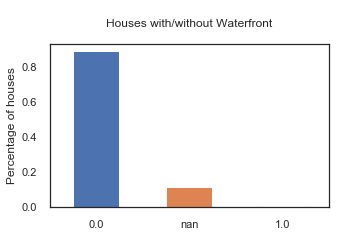

In [14]:
kc_house_df_dropsqft_basementna.waterfront.value_counts(normalize=True).plot.bar(rot=0, sort_columns=True, 
                                                    title="\nHouses with/without Waterfront\n", figsize=(5,3))
plt.ylabel('Percentage of houses');
kc_house_df_dropsqft_basementna.waterfront.value_counts()/len(kc_house_df_dropsqft_basementna.waterfront)
#Not all houses can be on the waterfront, and everyone has got to live somewhere. 
#https://github.com/BrittaInData/dsc-1-final-project-online-ds-ft-100118/blob/master/01_Final_Notebook.ipynb

Let's see how having a house on the waterfront affected price.

Min:['78000.0', '285000.0', '80000.0']
Median:['450000.0', '1580000.0', '445000.0']
Max:['7700000.0', '7060000.0', '3200000.0']


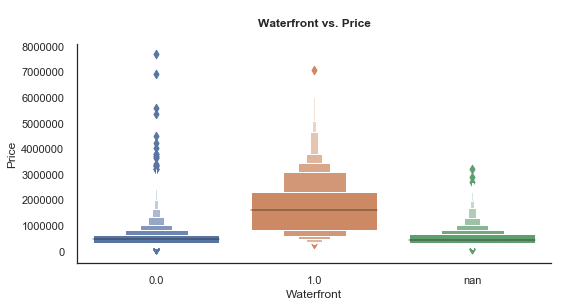

In [15]:
sns.catplot(x="waterfront", y="price", kind='boxen', data=kc_house_df_dropsqft_basementna, height=4, aspect=2)
plt.title('\nWaterfront vs. Price\n', fontweight='bold')
plt.xlabel('Waterfront')
plt.ylabel('Price');
mins = kc_house_df_dropsqft_basementna.groupby(['waterfront'])['price'].min().values
min_labels = [str(np.round(s, 2)) for s in mins]
print('Min:' + str(min_labels))
medians = kc_house_df_dropsqft_basementna.groupby(['waterfront'])['price'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
print('Median:' + str(median_labels))
maxes = kc_house_df_dropsqft_basementna.groupby(['waterfront'])['price'].max().values
max_labels = [str(np.round(s, 2)) for s in maxes]
print('Max:' + str(max_labels))
#While a majority of houses sold were not on the waterfront, the prices at which houses were sold appears to be higher as indicated on the boxenplot distribution below. Sadly, houses cannot be picked up and moved to a waterfront, so this can mainly be a key selling point for those selling a home on the waterfront.  
#https://seaborn.pydata.org/tutorial/categorical.html

Question #1: Does the size of a house impact the sales value?

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


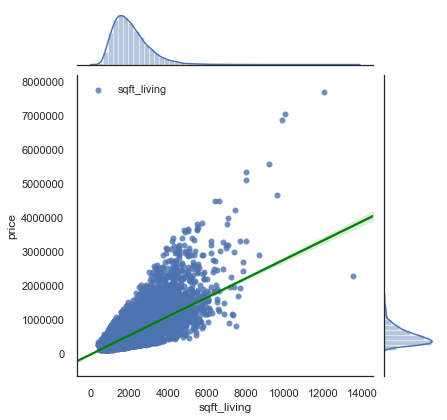

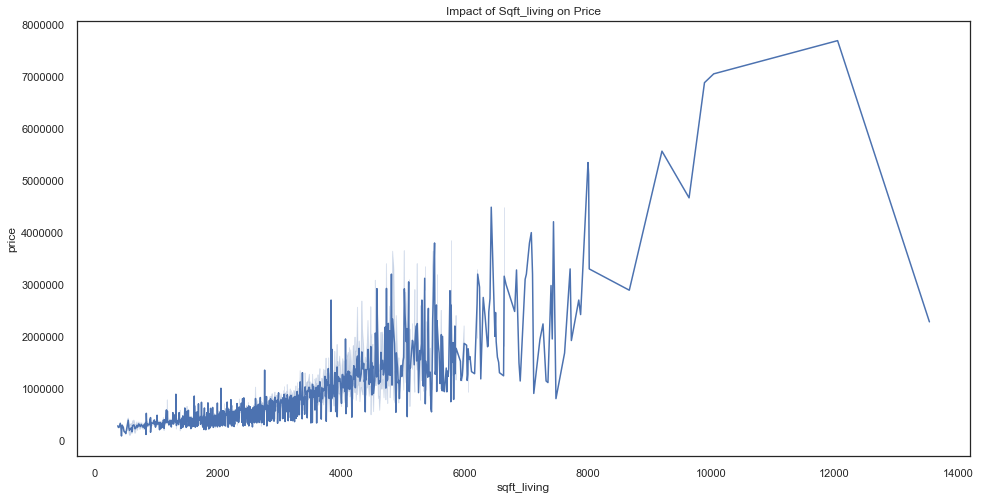

In [16]:
sns.jointplot(x='sqft_living', y="price",
                data=kc_house_df_dropsqft_basementna, 
                kind='reg', 
                label='sqft_living',
                joint_kws={'line_kws':{'color':'green'}})
plt.legend()
plt.show()

plt.figure(figsize=(16,8))
sns.lineplot(kc_house_df_dropsqft_basementna.sqft_living, kc_house_df_dropsqft_basementna.price)
plt.title('Impact of Sqft_living on Price')
plt.show()
#There is a positive linear correlation between house size and price, however the variability in price spreads after houses pass about 5000 sqft. 

Question #2: How does timing of renovations increase the sales value of a house?

Min:['78000.0', '256000.0', '152900.0', '154000.0', '186000.0', '110000.0']
Median:['449000.0', '443500.0', '450000.0', '537000.0', '653000.0', '707500.0']
Max:['6890000.0', '565000.0', '2050000.0', '7700000.0', '2650000.0', '7060000.0']


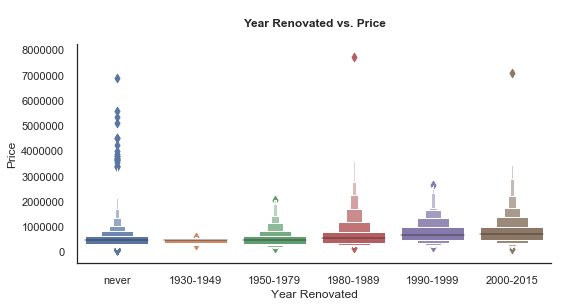

In [17]:
sns.catplot(x="yr_ren_cat", y="price", kind='boxen', data=kc_house_df_dropsqft_basementna, height=4, aspect=2)
plt.title('\nYear Renovated vs. Price\n', fontweight='bold')
plt.xlabel('Year Renovated')
plt.ylabel('Price');
mins = kc_house_df_dropsqft_basementna.groupby(['yr_ren_cat'])['price'].min().values
min_labels = [str(np.round(s, 2)) for s in mins]
print('Min:' + str(min_labels))
medians = kc_house_df_dropsqft_basementna.groupby(['yr_ren_cat'])['price'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
print('Median:' + str(median_labels))
maxes = kc_house_df_dropsqft_basementna.groupby(['yr_ren_cat'])['price'].max().values
max_labels = [str(np.round(s, 2)) for s in maxes]
print('Max:' + str(max_labels))
#The median price of houses increased for more recently-renovated homes (e.g., ~$708K for homes renovated in 2000-2015) compared to those who never renovated or renovated between 1930-1979 (~$450K).
#https://seaborn.pydata.org/tutorial/categorical.html

Question# 3: How does grade impact the price of a house?

Min:['262000.0', '80000.0', '78000.0', '82000.0', '90000.0', '140000.0', '230000.0', '316000.0', '420000.0', '835000.0', '1780000.0']
Median:['262000.0', '200000.0', '229950.0', '276000.0', '375000.0', '512250.0', '721750.0', '910500.0', '1280000.0', '1820000.0', '2980000.0']
Max:['262000.0', '435000.0', '795000.0', '1200000.0', '2050000.0', '3070000.0', '2700000.0', '3600000.0', '7060000.0', '5350000.0', '7700000.0']


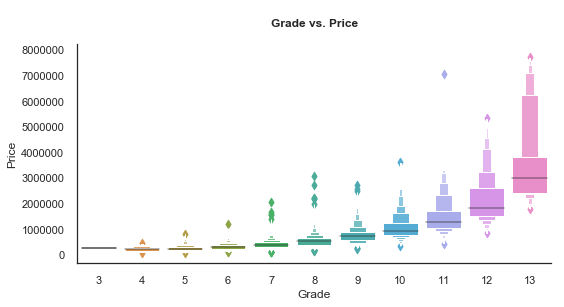

In [18]:
sns.catplot(x="grade", y="price", kind='boxen', data=kc_house_df_dropsqft_basementna, height=4, aspect=2)
plt.title('\nGrade vs. Price\n', fontweight='bold')
plt.xlabel('Grade')
plt.ylabel('Price');
mins = kc_house_df_dropsqft_basementna.groupby(['grade'])['price'].min().values
min_labels = [str(np.round(s, 2)) for s in mins]
print('Min:' + str(min_labels))
medians = kc_house_df_dropsqft_basementna.groupby(['grade'])['price'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
print('Median:' + str(median_labels))
maxes = kc_house_df_dropsqft_basementna.groupby(['grade'])['price'].max().values
max_labels = [str(np.round(s, 2)) for s in maxes]
print('Max:' + str(max_labels))
#Grade has a very strong linear relationship with a house's selling price. The median price for a grade 13 house was over 10x the median price of a grade 3 house! 
#https://seaborn.pydata.org/tutorial/categorical.html

# Model the Data
1. Remember must satisfy assumptions of linear regression (Normality, Linearity, Multicollinearity of Independent Variables, Homoescedasticity of Residuals) 
2. One-hot encoding of categorical data
3. Fit the model (OLS)
4. Train/test-split
5. Cross validation

In [19]:

import statsmodels.api as sm
from statsmodels.formula.api import ols
kc_house_features = kc_house_df_dropsqft_basementna.drop(['id', 'date', 'price', 'lat', 'zipcode', 'long', 'sqft_living15', 'yr_ren_cat', 'waterfront','sqft_lot', 'yr_renovated'], axis=1)
kc_house_target = kc_house_df_dropsqft_basementna[['price']]
data = pd.concat([kc_house_features, kc_house_target], axis=1)
predictors = kc_house_features
predictors_int = sm.add_constant(predictors)
model = sm.OLS(data['price'],predictors_int).fit()
model.summary()
#This model has an R-squared of 0.639--which means that ~64% of the variations in price are explained by the independent variables included in this model. Dropped 'id', 'date (sold)', 'zipcode', 'lat', and 'long' due to categorical (and/or non-continuous) information and/or does not have any apparent correlation with price.
#Sqft_living15 was removed due to multicolinearity with sqft_living, and it had a lower correlation with price.
#Sqft_lot was removed since it had a high p-value of 0.05 and a relatively low correlation.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     3719.
Date:                Wed, 24 Apr 2019   Prob (F-statistic):               0.00
Time:                        08:50:25   Log-Likelihood:            -2.8930e+05
No. Observations:               21082   AIC:                         5.786e+05
Df Residuals:                   21071   BIC:                         5.787e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.291e+06   1.35e+05     46.466      0.000    6.03e+06    6.56e+06
bedrooms      -4.222e+04   2101.883    -20.087      0.000   -4.63e+04   -3.81e+04
bathrooms      4.593e+04   3591.748     12.788      0.000    3.89e+04     5.3e+04
sqft_living     115.9130      2.368     48.954      0.000     111.272     120.554
floors          2.43e+04   3868.006      6.283      0.000    1.67e+04    3.19e+04
view            7.22e+04   2154.889     33.507      0.000     6.8e+04    7.64e+04
condition      1.911e+04   2544.801      7.508      0.000    1.41e+04    2.41e+04
grade          1.228e+05   2239.461     54.827      0.000    1.18e+05    1.27e+05
sqft_above       59.7444      2.258     26.453      0.000      55.318      64.171
sqft_basement    56.1686      2.877     19.522      0.000      50.529      61.808
yr_built      -3612.9595     69.616    -51.899      0.000   -3749.412   -3476.507
sqft_lot15       -0.5532      0.058     -9.535      0.000      -0.667      -0.440
==============================================================================
Omnibus:                    16343.879   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1171988.274
Skew:                           3.167   Prob(JB):                         0.00
Kurtosis:                      38.973   Cond. No.                     1.91e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.23e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Checking for normality

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


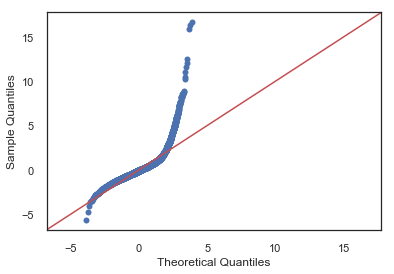

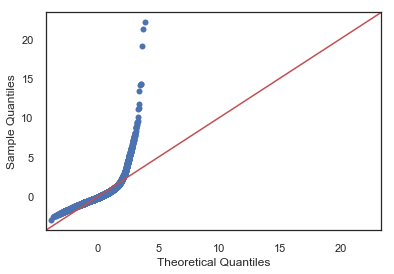

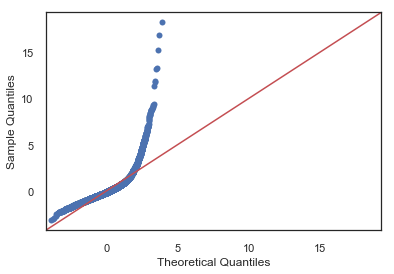

In [20]:
import scipy.stats as stats

import statsmodels.formula.api as smf
data = pd.read_csv('kc_house_data.csv', index_col=0)
f = 'price~sqft_living'
f1 = 'price~grade'
f2 = 'price~sqft_above'
model = smf.ols(formula=f, data=data).fit()
model1 = smf.ols(formula=f1, data=data).fit()
model2 = smf.ols(formula=f2, data=data).fit()
resid = model.resid
resid1 = model1.resid
resid2 = model2.resid

fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True, label ='sqft_living')
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True, label ='grade')
fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True, label ='sqft_above')

fig.show()
#The QQplots below show the error terms (residuals) from the model against a standard normal distribution. The deviation of the curve from the straight line shows the residuals do not match what we would expect from a normal distribution, and is consistent with a skewed distribution. 

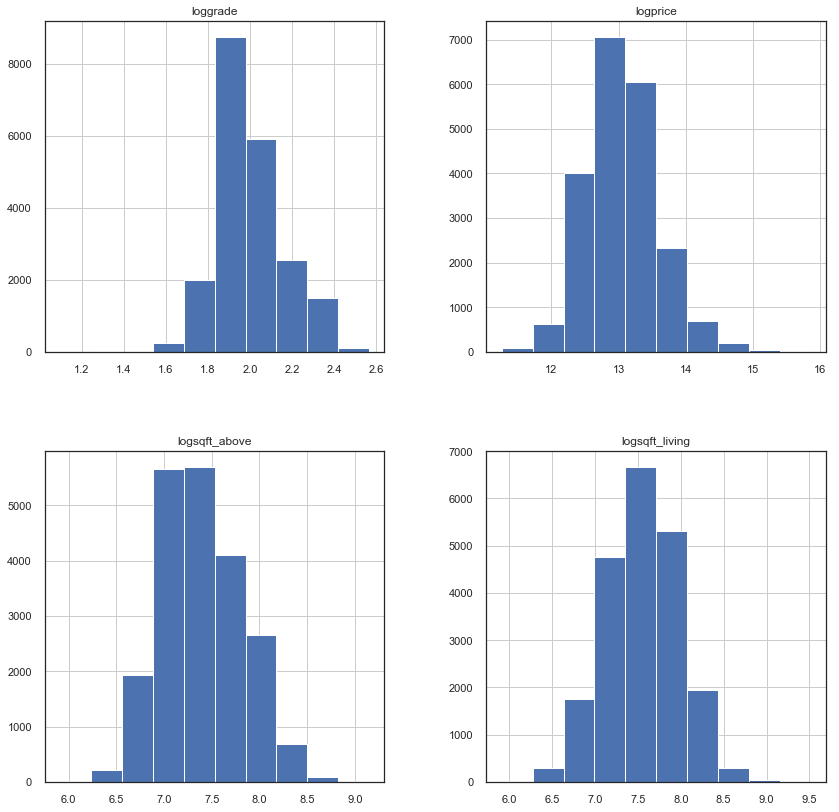

In [21]:
import numpy as np
data_log = pd.DataFrame([])
data_log["logprice"] = np.log(kc_house_target["price"])
data_log["logsqft_living"] = np.log(kc_house_features["sqft_living"])
data_log["loggrade"] = np.log(kc_house_features["grade"])
data_log["logsqft_above"] = np.log(kc_house_features["sqft_above"])

data_log.hist(figsize  = [14, 14]);
#Most of the skews are resolved by taking the log of the variable, as seen by the distributions below. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally. #https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation)

Describe the new log columns

In [22]:
data_log.describe()

,logprice,logsqft_living,loggrade,logsqft_above
count,21082.000000,21082.000000,21082.000000,21082.000000
mean,13.048217,7.550815,2.024421,7.395389
std,0.526394,0.423980,0.149396,0.427009
min,11.264464,5.913503,1.098612,5.913503
25%,12.682307,7.265430,1.945910,7.090077
50%,13.017003,7.554859,1.945910,7.352441
75%,13.377006,7.843849,2.079442,7.700748
max,15.856731,9.513404,2.564949,9.149528


Recalculate the OLS regression with the log predictor variables and target variable.

In [23]:
kc_house_features['logsqft_living'] = data_log[["logsqft_living"]] 
kc_house_features['loggrade'] = data_log[["loggrade"]]
kc_house_features['logsqft_above'] = data_log[["logsqft_above"]]
kc_house_predictors = kc_house_features.drop(['grade','sqft_living','sqft_above'], axis = 1)
kc_house_logtarget = data_log[['logprice']]
data = pd.concat([kc_house_predictors, kc_house_logtarget], axis=1)
predictors_log = kc_house_predictors
predictors_int_log = sm.add_constant(predictors_log)
model = sm.OLS(data['logprice'],predictors_int_log).fit()
model.summary()


#All of the p-values (P > |t|) are < 0.05, indicating that the relationships between the independent (predictor) variables and price are statistically significant, and therefore this model's verdict on the null hypothesis will consistently represent the larger population. The adjusted R-squared has slightly increased with the log transformation of the price--suggesting that this model is a similarly better fit than the baseline model (i.e., 64.4% of the variance in price is predictable from the linear regression model created by the above independent variables).  The skewness went from 3.2 to -0.08, resulting in a more normalized distribution. The kurtosis also decreased, indicating that the log transformation helped push the peak toward the enter of distribution and normalized the data.  
#Other reasons for log transformation: Since we’re performing a statistical analysis that assumes normality, a log transformation might help us meet this assumption. Another reason is to help meet the assumption of constant variance in the context of linear modeling. Yet another is to help make a non-linear relationship more linear. 
#- https://data.library.virginia.edu/interpreting-log-transformations-in-a-linear-model/

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     3431.
Date:                Wed, 24 Apr 2019   Prob (F-statistic):               0.00
Time:                        08:50:26   Log-Likelihood:                -5565.3
No. Observations:               21082   AIC:                         1.115e+04
Df Residuals:                   21070   BIC:                         1.125e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             18.0506      0.200     90.172      0.000      17.658      18.443
bedrooms          -0.0408      0.003    -13.109      0.000      -0.047      -0.035
bathrooms          0.0840      0.005     16.490      0.000       0.074       0.094
floors             0.0958      0.006     17.193      0.000       0.085       0.107
view               0.0710      0.003     22.935      0.000       0.065       0.077
condition          0.0323      0.004      8.886      0.000       0.025       0.039
sqft_basement   9.089e-05   1.43e-05      6.334      0.000    6.28e-05       0.000
yr_built          -0.0059   9.95e-05    -58.973      0.000      -0.006      -0.006
sqft_lot15     -7.246e-08   8.25e-08     -0.878      0.380   -2.34e-07    8.93e-08
logsqft_living     0.2707      0.029      9.232      0.000       0.213       0.328
loggrade           1.7652      0.024     72.283      0.000       1.717       1.813
logsqft_above      0.0832      0.027      3.120      0.002       0.031       0.135
==============================================================================
Omnibus:                       85.141   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.172
Skew:                          -0.008   Prob(JB):                     3.60e-26
Kurtosis:                       3.365   Cond. No.                     2.77e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


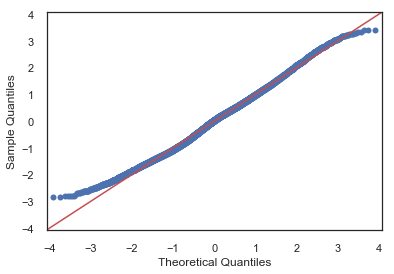

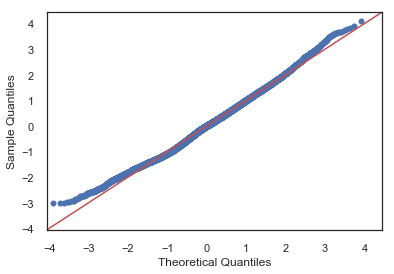

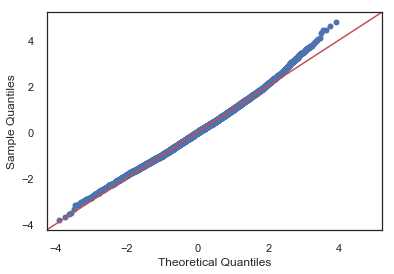

In [24]:
import scipy.stats as stats

import statsmodels.formula.api as smf
f5 = 'logprice~logsqft_living'
f6 = 'logprice~logsqft_above'
f7 = 'logprice~loggrade'
model5 = smf.ols(formula=f5, data=data).fit()
model6 = smf.ols(formula=f6, data=data).fit()
model7 = smf.ols(formula=f7, data=data).fit()

resid5 = model5.resid
resid6 = model6.resid
resid7 = model7.resid
fig = sm.graphics.qqplot(resid5, dist=stats.norm, line='45', fit=True,   )
fig = sm.graphics.qqplot(resid6, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid7, dist=stats.norm, line='45', fit=True)
fig.show()



fig.show()
#The QQ plots below look better with the log transformations!

One-hot encoding is needed to convert categorical variables (zipcode and yr_ren_cat) to dummy numerical variables, to allow us to incorporate these categorical variables into our regression model. The advantage of using dummies is that, whatever algorithm you'll be using, your numerical values cannot be misinterpreted as being continuous.

In [25]:
zipcode_dummies = pd.get_dummies(kc_house_df_dropsqft_basementna.zipcode, prefix='zipcode').iloc[:,1:]
kc_house_features_wonehotzipcode_dummies = pd.concat([kc_house_predictors, zipcode_dummies], axis =1)
data = pd.concat([kc_house_features_wonehotzipcode_dummies, kc_house_logtarget], axis=1)
yr_ren_cat_dummies = pd.get_dummies(kc_house_df_dropsqft_basementna.yr_ren_cat, prefix='yr_ren_cat').iloc[:,1:]
kc_house_features_wonehotyr_ren_cat_dummies = pd.concat([kc_house_features_wonehotzipcode_dummies, yr_ren_cat_dummies], axis =1)
data = pd.concat([kc_house_features_wonehotyr_ren_cat_dummies, kc_house_logtarget], axis=1)
predictors_onehotzip = kc_house_features_wonehotzipcode_dummies
predictors_int_onehotzip = sm.add_constant(predictors_onehotzip)
predictors_onehotyr_ren_cat = kc_house_features_wonehotyr_ren_cat_dummies
predictors_int_onehotyr_ren_cat = sm.add_constant(predictors_onehotyr_ren_cat)
model = sm.OLS(kc_house_logtarget,predictors_int_onehotyr_ren_cat).fit()
model.summary()
#Creating dummy variables for zipcode and year renovated increased our r-squared to 0.871 and adjusted r-squared to 0.870. A model that has an r-squared of at least 0.7 can tell us that with about 70% certainty we can predict the target variable.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1663.
Date:                Wed, 24 Apr 2019   Prob (F-statistic):               0.00
Time:                        08:50:27   Log-Likelihood:                 5175.5
No. Observations:               21082   AIC:                        -1.018e+04
Df Residuals:                   20996   BIC:                            -9495.
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.6265      0.159     54.419      0.000       8.316       8.937
bedrooms                -0.0210      0.002    -11.071      0.000      -0.025      -0.017
bathrooms                0.0417      0.003     13.356      0.000       0.036       0.048
floors                  -0.0486      0.004    -12.644      0.000      -0.056      -0.041
view                     0.0929      0.002     48.017      0.000       0.089       0.097
condition                0.0457      0.002     19.959      0.000       0.041       0.050
sqft_basement         2.195e-05   8.74e-06      2.511      0.012    4.82e-06    3.91e-05
yr_built                -0.0009   7.68e-05    -12.060      0.000      -0.001      -0.001
sqft_lot15            8.212e-07   5.48e-08     14.991      0.000    7.14e-07    9.29e-07
logsqft_living           0.2905      0.018     16.278      0.000       0.256       0.325
loggrade                 0.7815      0.016     48.210      0.000       0.750       0.813
logsqft_above            0.2514      0.016     15.249      0.000       0.219       0.284
zipcode_98002           -0.0317      0.017     -1.873      0.061      -0.065       0.001
zipcode_98003            0.0021      0.015      0.136      0.892      -0.028       0.032
zipcode_98004            1.1375      0.015     76.183      0.000       1.108       1.167
zipcode_98005            0.7447      0.018     41.391      0.000       0.709       0.780
zipcode_98006            0.6581      0.013     48.784      0.000       0.632       0.685
zipcode_98007            0.6453      0.019     33.814      0.000       0.608       0.683
zipcode_98008            0.6424      0.015     41.989      0.000       0.612       0.672
zipcode_98010            0.2720      0.022     12.477      0.000       0.229       0.315
zipcode_98011            0.4523      0.017     26.479      0.000       0.419       0.486
zipcode_98014            0.3222      0.020     15.902      0.000       0.282       0.362
zipcode_98019            0.3312      0.017     19.220      0.000       0.297       0.365
zipcode_98022            0.0268      0.016      1.635      0.102      -0.005       0.059
zipcode_98023           -0.0314      0.013     -2.354      0.019      -0.057      -0.005
zipcode_98024            0.4441      0.024     18.474      0.000       0.397       0.491
zipcode_98027            0.5266      0.014     37.602      0.000       0.499       0.554
zipcode_98028            0.4180      0.015     27.328      0.000       0.388       0.448
zipcode_98029            0.5960      0.015     39.963      0.000       0.567       0.625
zipcode_98030            0.0493      0.016      3.138      0.002       0.019       0.080
zipcode_98031            0.0752      0.015      4.867      0.000       0.045       0.105
zipcode_98032           -0.0296      0.020     -1.483    

# Interpret the results

In [26]:

from sklearn.linear_model import LinearRegression
X = predictors_int_onehotyr_ren_cat
y = data_log["logprice"]

linreg = LinearRegression()
linreg.fit(X, y)
print(linreg.coef_)
linreg.intercept_


[ 6.25924900e-13 -2.10429806e-02  4.16663471e-02 -4.85735354e-02
  9.29359432e-02  4.57380820e-02  2.19527291e-05 -9.26430530e-04
  8.21159949e-07  2.90517511e-01  7.81470102e-01  2.51409487e-01
 -3.16738602e-02  2.08050616e-03  1.13753433e+00  7.44676789e-01
  6.58080869e-01  6.45331828e-01  6.42381731e-01  2.71963723e-01
  4.52266472e-01  3.22179565e-01  3.31193424e-01  2.67571258e-02
 -3.13639590e-02  4.44116248e-01  5.26634215e-01  4.18042910e-01
  5.95986469e-01  4.92800613e-02  7.51831862e-02 -2.96211896e-02
  7.87828101e-01  5.39666094e-01  1.75656334e-01  1.33288638e+00
  9.02861176e-01  6.94133998e-02  3.24364381e-01  6.44768424e-01
  5.99290360e-01  1.36684037e-01  3.22670886e-01  1.66653820e-01
  3.56589566e-01  4.17733200e-01  3.69565275e-01  5.08137217e-01
  5.79556072e-01  6.06922062e-01  4.90656803e-01  1.78103174e-02
  9.44838438e-01  7.91544978e-01  9.28310841e-01  3.46355646e-01
  8.16349707e-01  3.48225749e-01  9.46666279e-01  1.03044445e+00
  7.95276516e-01  7.27701

8.626464986990198

Train/Test-Split

In [27]:
from sklearn.model_selection import train_test_split
#Initializing the model class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
linreg = LinearRegression()
#Fitting the model to the train data
linreg.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
#Calculating predictions on the train set, and on the test set
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
#Calculating the residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test
#Calculating the mean squared error (to compare overall performance: the actual vs. the predicted values) on the train and test sets
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)
#Because the test error is not worse than the train error, this suggests the model generalizes well to future cases (i.e., there is no overfitting of our model). 

Train Mean Squared Error: 0.036021408488758976
Test Mean Squared Error: 0.0356342026312666


Cross-Validation

In [28]:
#Because the train and test samples are created from random samples of the data, the MSEs are strongly dependent on the sample used (e..g, the split of 70-30 vs. othe ratio, and the sample data that are used to create the split). The quality of the model must also be validated using cross valiadtion, where the average of iteravely trained and tested linear regression models are sampled from k number of slices of the dataset to get a cross-validation MSE (which is supposed to be closer to the model's actual MSE). 
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score  

print('R^2:', metrics.r2_score(y_train, y_hat_train))  #https://www.kaggle.com/shreayan98c/boston-house-price-prediction
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_hat_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))  #https://www.kaggle.com/shreayan98c/boston-house-price-prediction
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))
cv_20_results
#The r-squared and adjusted r-sqaured are similar to the OLS calculation, and relatively close to 1 indicating a strong correlation between the predictor variables and price. The cv is also consistent with the train and test mean squared error results and a consistently low error is good because it means that the model is good at predicting actual price values.

R^2: 0.8715396529269249
Adjusted R^2: 0.8707865793176349


-0.03625657387549537

Visualizing the differences between actual prices and predicted values.

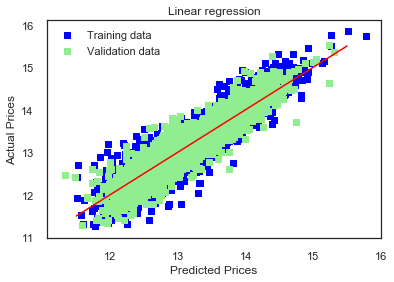

In [29]:
plt.scatter(y_hat_train, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_hat_test, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted Prices")
plt.ylabel("Actual Prices")
plt.legend(loc = "upper left")
plt.plot([11.5, 15.5], [11.5, 15.5], c = "red")
plt.show()
#https://www.kaggle.com/madislemsalu/predicting-housing-prices-in-king-county-usa. There is no visible pattern in this plot with values relatively equally distributed around the red line, satisfying the linearity assumption. 

Linearity of Residuals

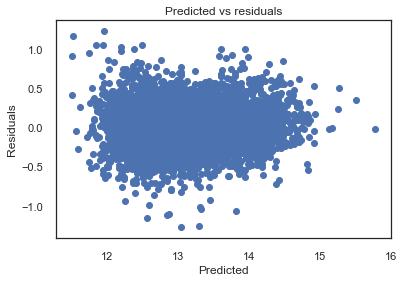

In [30]:
plt.scatter(y_hat_train,y_train-y_hat_train)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()
#The plot below confirms linearity: There is no pattern visible in this plot and values are distributed equally around zero, therefore, the linearity assumption is satisfied.
#https://www.kaggle.com/shreayan98c/boston-house-price-prediction. 

Normality of Residuals

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


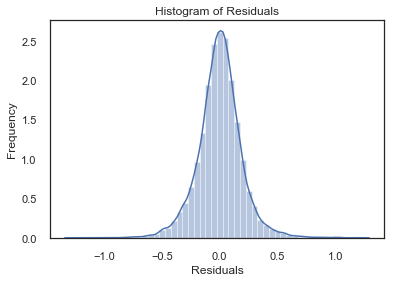

In [31]:
sns.distplot(y_train-y_hat_train)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()
#https://www.kaggle.com/shreayan98c/boston-house-price-prediction. The normal distribution of the residuals shows the normality assumption is satisfied.

In [32]:
model = sm.OLS(kc_house_logtarget,predictors_int_onehotyr_ren_cat).fit()
model.summary()
#The coefficients in the equation define the nature of relationship between each independent variable and the dependent variable both in strength and direction.
#For example, a 1% increase in sqqft_living is correlated with a ~7.7% increase in price. 
#Only the dependent/response variable is log-transformed. Exponentiate the coefficient, subtract one from this number, and multiply by 100. This gives the percent increase (or decrease) in the response for every one-unit increase in the independent variable. Example: the coefficient is 0.198. (exp(0.198) – 1) * 100 = 21.9. For every one-unit increase in the independent variable, our dependent variable increases by about 22%.
#Only independent/predictor variable(s) is log-transformed. Divide the coefficient by 100. This tells us that a 1% increase in the independent variable increases (or decreases) the dependent variable by (coefficient/100) units. Example: the coefficient is 0.198. 0.198/100 = 0.00198. For every 1% increase in the independent variable, our dependent variable increases by about 0.002. For x percent increase, multiply the coefficient by log(1.x). Example: For every 10% increase in the independent variable, our dependent variable increases by about 0.198 * log(1.10) = 0.02.
#Both dependent/response variable and independent/predictor variable(s) are log-transformed. Interpret the coefficient as the percent increase in the dependent variable for every 1% increase in the independent variable. Example: the coefficient is 0.198. For every 1% increase in the independent variable, our dependent variable increases by about 0.20%. For x percent increase, calculate 1.x to the power of the coefficient, subtract from 1, and multiply by 100. Example: For every 20% increase in the independent variable, our dependent variable increases by about (1.20 0.198 – 1) * 100 = 3.7 percent.
#- https://data.library.virginia.edu/interpreting-log-transformations-in-a-linear-model/

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1663.
Date:                Wed, 24 Apr 2019   Prob (F-statistic):               0.00
Time:                        08:50:29   Log-Likelihood:                 5175.5
No. Observations:               21082   AIC:                        -1.018e+04
Df Residuals:                   20996   BIC:                            -9495.
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.6265      0.159     54.419      0.000       8.316       8.937
bedrooms                -0.0210      0.002    -11.071      0.000      -0.025      -0.017
bathrooms                0.0417      0.003     13.356      0.000       0.036       0.048
floors                  -0.0486      0.004    -12.644      0.000      -0.056      -0.041
view                     0.0929      0.002     48.017      0.000       0.089       0.097
condition                0.0457      0.002     19.959      0.000       0.041       0.050
sqft_basement         2.195e-05   8.74e-06      2.511      0.012    4.82e-06    3.91e-05
yr_built                -0.0009   7.68e-05    -12.060      0.000      -0.001      -0.001
sqft_lot15            8.212e-07   5.48e-08     14.991      0.000    7.14e-07    9.29e-07
logsqft_living           0.2905      0.018     16.278      0.000       0.256       0.325
loggrade                 0.7815      0.016     48.210      0.000       0.750       0.813
logsqft_above            0.2514      0.016     15.249      0.000       0.219       0.284
zipcode_98002           -0.0317      0.017     -1.873      0.061      -0.065       0.001
zipcode_98003            0.0021      0.015      0.136      0.892      -0.028       0.032
zipcode_98004            1.1375      0.015     76.183      0.000       1.108       1.167
zipcode_98005            0.7447      0.018     41.391      0.000       0.709       0.780
zipcode_98006            0.6581      0.013     48.784      0.000       0.632       0.685
zipcode_98007            0.6453      0.019     33.814      0.000       0.608       0.683
zipcode_98008            0.6424      0.015     41.989      0.000       0.612       0.672
zipcode_98010            0.2720      0.022     12.477      0.000       0.229       0.315
zipcode_98011            0.4523      0.017     26.479      0.000       0.419       0.486
zipcode_98014            0.3222      0.020     15.902      0.000       0.282       0.362
zipcode_98019            0.3312      0.017     19.220      0.000       0.297       0.365
zipcode_98022            0.0268      0.016      1.635      0.102      -0.005       0.059
zipcode_98023           -0.0314      0.013     -2.354      0.019      -0.057      -0.005
zipcode_98024            0.4441      0.024     18.474      0.000       0.397       0.491
zipcode_98027            0.5266      0.014     37.602      0.000       0.499       0.554
zipcode_98028            0.4180      0.015     27.328      0.000       0.388       0.448
zipcode_98029            0.5960      0.015     39.963      0.000       0.567       0.625
zipcode_98030            0.0493      0.016      3.138      0.002       0.019       0.080
zipcode_98031            0.0752      0.015      4.867      0.000       0.045       0.105
zipcode_98032           -0.0296      0.020     -1.483    

In [ ]:
-------------Ignore below this line--------------------

In [ ]:
#Question: What are the top 3 features that correlate with housing prices (i.e., contribute to maximzing profits for homeowners who wish to sell their homes)?
#Answer: Square footage of home/living space, grade of the house, and square footage of the house above the basement. 

In [ ]:
#Question: What is the predicted/recommended selling price for a client who has a sqfoot_living = 3200, sqft_above = 3200, and grade of 7?  house_features['sqft_living','grade','sqft_above']
X_subset = kc_house_features.iloc[:,3,9,10]
X_subset_train, X_subset_test, y__subset_train, y_subset_test = train_test_split(X_subset, y, test_size = 0.3)
linreg = LinearRegression()
#Fitting the model to the train data
linreg.fit(X_subset_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
#Calculating predictions on the train set, and on the test set
y_hat_train = linreg.predict(X_subset_train)
y_hat_test = linreg.predict(X__subset_test)
#Calculating the residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test
#Calculating the mean squared error (to compare overall performance: the actual vs. the predicted values) on the train and test sets
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)
print('R^2:', metrics.r2_score(y_train, y_hat_train))  #https://www.kaggle.com/shreayan98c/boston-house-price-prediction
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_hat_train))*(len(y_train)-1)/(len(y_train)-X_subset_train.shape[1]-1))  #https://www.kaggle.com/shreayan98c/boston-house-price-prediction
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))
print(cv_20_results)


client_data = [[3200, 7, 3200]] #https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d   
for i, price in enumerate(linreg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))    

In [ ]:
kc_house_df_dropsqft_basementna['zipcode'] = kc_house_df_dropsqft_basementna['zipcode'].astype('str')
kc_house_df_dropsqft_basementna['zipcode'] = kc_house_df_dropsqft_basementna['zipcode'].str[:-1]
kc_house_df_dropsqft_basementna.head()

In [ ]:
 'condition', 'yr_built', 'sqft_lot15', 'yr_renovated', 'floors', 'bedrooms', 'sqft_basement’
kc_house_logtarget = data_log[['logprice']]
data = pd.concat([kc_house_features, kc_house_logtarget], axis=1)
predictors_log = kc_house_features
predictors_int_log = sm.add_constant(predictors_log)
model = sm.OLS(data['logprice'],predictors_int_log).fit()
model.summary()


In [ ]:
cat_dummies = pd.get_dummies(kc_house_df_dropsqft_basementna).iloc[:,1:]
kc_house_features_wonehotdummies = pd.concat([kc_house_predictors, cat_dummies], axis =1)
data = pd.concat([kc_house_features_wonehotdummies, kc_house_logtarget], axis=1)
predictors_onehotdummies = kc_house_features_wonehotdummies
predictors_int_onehotdummies = sm.add_constant(predictors_onehotdummies)
model = sm.OLS(kc_house_logtarget,predictors_int_onehotdummies).fit()
model.summary()
#One-hot encodes all categorical data (this includes dates houses were sold, waterfront, yr_ren_cat)

In [ ]:
# pair the feature names with the (sorted) coefficients calculated in the final model
feature_cols = ['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'sqft_basement', 'yr_built', 'sqft_lot15', 'logsqft_living', 'loggrade', 'logsqft_above', 'zipcode_98001', 'zipcode_98002', 'zipcode_98003','zipcode_98004','zipcode_98005','zipcode_98006','zipcode_98007','zipcode_98008','zipcode_98010','zipcode_98011','zipcode_98014','zipcode_98019','zipcode_98022','zipcode_98023','zipcode_98024','zipcode_98027','zipcode_98028','zipcode_98029','zipcode_98030','zipcode_98031','zipcode_98032','zipcode_98033','zipcode_98034','zipcode_98038','zipcode_98039','zipcode_98040','zipcode_98042','zipcode_98045','zipcode_98052','zipcode_98053','zipcode_98055','zipcode_98056','zipcode_98058','zipcode_98059','zipcode_98065','zipcode_98070','zipcode_98072','zipcode_98074','zipcode_98075','zipcode_98077','zipcode_98092','zipcode_98102','zipcode_98103','zipcode_98105','zipcode_98106','zipcode_98107','zipcode_98108','zipcode_98109','zipcode_98112','zipcode_98115','zipcode_98116','zipcode_98117','zipcode_98118','zipcode_98119','zipcode_98122','zipcode_98125','zipcode_98126','zipcode_98133','zipcode_98136','zipcode_98144','zipcode_98146','zipcode_98148','zipcode_98155','zipcode_98166','zipcode_98168','zipcode_98177','zipcode_98178','zipcode_98188','zipcode_98198','zipcode_98199', 'yr_ren_cat_1930-1949', 'yr_ren_cat_1950-1979', 'yr_ren_cat_1980-1989', 'yr_ren_cat_1990-1999', 'yr_ren_cat_2000-2015']
pd.DataFrame(list(zip(feature_cols, linreg.coef_)), columns=['Features', 'Estimated Coefficient']).sort_values(by='Estimated Coefficient', ascending=False)
